In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

NR_SAMPLES_PER_HOUR = 6
# 10 minutes
MINUTES_BETWEEN_SAMPLES = int(60 / NR_SAMPLES_PER_HOUR)


def load_cpu_stats(filename):
    # TODO: will load from file, get random cpu stats firstly
    def random_list(start, stop, length):
        return [random.randrange(start, stop) for i in range(length)]

    stats = []
    hours = range(0, 5)
    stats.extend(random_list(1, 5, NR_SAMPLES_PER_HOUR * len(hours)))
    hours = range(5, 19)
    stats.extend(random_list(90, 98, NR_SAMPLES_PER_HOUR * len(hours)))
    hours = range(19, 24)
    stats.extend(random_list(1, 5, NR_SAMPLES_PER_HOUR * len(hours)))
    return stats


def calc_idle_threshold(stats, max_threshold=75):
    #return 10
    copy_stats = list(stats)
    copy_stats.sort()
    index = int(len(copy_stats) / 3)
    threshold = copy_stats[index]
    if threshold > max_threshold:
        threshold = max_threshold
    return threshold


def generate_idle_map(stats):
    threshold = calc_idle_threshold(stats)
    # 1: busy, 0: idle
    return [0 if p < threshold else 1 for p in stats]


def merge_idle_map(idle_map1, idle_map2):
    return list(map(lambda x, y: 0 if x == 0 and y == 0 else 1, idle_map1, idle_map2))


def collect_idle_time_windows(idle_map):
    time_windows = {}
    nr_idle = 0
    for index, value in enumerate(idle_map):
        if value == 0:
            nr_idle += 1
        else:
            if nr_idle > 0:
                # key: start sample index
                # value: number of idle samples
                time_windows[index - nr_idle] = nr_idle
                nr_idle = 0
    # sort by value from max to min
    # returns: [(k1,v1), (k2,v2), ...]
    return sorted(time_windows.items(), key=lambda item: item[1], reverse=True)


def show_idle_time_windows(idle_time_window):
    print("")
    for t in idle_time_window:
        start_hour = int(t[0] / NR_SAMPLES_PER_HOUR)
        start_minute = (t[0] % NR_SAMPLES_PER_HOUR) * MINUTES_BETWEEN_SAMPLES
        end_hour = int((t[0] + t[1]) / NR_SAMPLES_PER_HOUR)
        end_minute = ((t[0] + t[1]) % NR_SAMPLES_PER_HOUR) * MINUTES_BETWEEN_SAMPLES
        print("{:>02d}:{:>02d} ~ {:>02d}:{:>02d} -> {:<3d} minutes".format(start_hour, start_minute, end_hour, end_minute, MINUTES_BETWEEN_SAMPLES * t[1]))
        

def draw_pic(title, data):
    x = np.linspace(0,len(data)-1,len(data))
    y = np.array(data)
    plt.plot(x, y)
    plt.title(title)
    plt.show()

In [2]:
# 3 days data
day1_stats = load_cpu_stats("")
day2_stats = load_cpu_stats("")
day3_stats = load_cpu_stats("")

day1_idle_map = generate_idle_map(day1_stats)
day2_idle_map = generate_idle_map(day2_stats)
day3_idle_map = generate_idle_map(day3_stats)

day1_idle_time_windows = collect_idle_time_windows(day1_idle_map)
day2_idle_time_windows = collect_idle_time_windows(day2_idle_map)
day3_idle_time_windows = collect_idle_time_windows(day3_idle_map)

In [3]:
print(day1_stats)
print(calc_idle_threshold(day1_stats))
print(day1_idle_map)
show_idle_time_windows(day1_idle_time_windows)

[3, 3, 1, 4, 2, 1, 4, 2, 1, 1, 1, 4, 3, 2, 1, 1, 3, 1, 4, 3, 4, 4, 4, 4, 1, 1, 2, 3, 1, 4, 97, 91, 91, 92, 94, 92, 94, 91, 90, 95, 93, 92, 94, 94, 95, 91, 90, 94, 94, 95, 92, 96, 92, 92, 93, 94, 91, 93, 91, 91, 92, 97, 96, 93, 90, 97, 95, 94, 92, 96, 92, 93, 95, 95, 90, 90, 97, 92, 93, 97, 90, 91, 97, 90, 95, 92, 97, 93, 95, 94, 96, 91, 90, 95, 93, 96, 97, 97, 97, 90, 90, 96, 90, 94, 95, 96, 91, 97, 95, 93, 96, 90, 91, 94, 1, 4, 4, 2, 4, 1, 4, 2, 4, 4, 1, 3, 2, 2, 3, 4, 1, 4, 4, 3, 2, 4, 4, 4, 1, 2, 1, 4, 1, 3]
4
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]

02:00 ~ 03:00 -> 60  minutes
04:00 ~ 04:50 -> 5

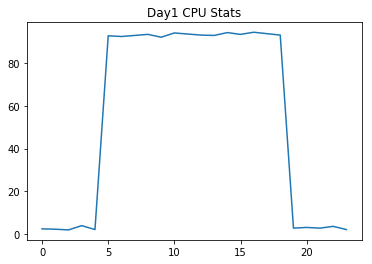

In [4]:
stats=[]
for index,value in enumerate(day1_stats):
    if index % NR_SAMPLES_PER_HOUR == 0:
        val = sum(day1_stats[index:index+NR_SAMPLES_PER_HOUR]) / NR_SAMPLES_PER_HOUR
        stats.append(val)

draw_pic('Day1 CPU Stats', stats)

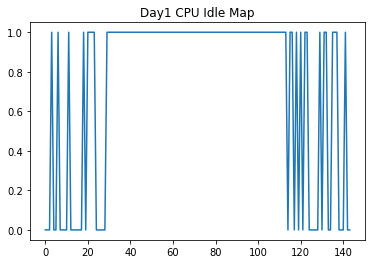

In [5]:
draw_pic('Day1 CPU Idle Map', day1_idle_map)

In [6]:
print(day2_stats)
print(calc_idle_threshold(day2_stats))
print(day2_idle_map)
show_idle_time_windows(day2_idle_time_windows)

[1, 2, 4, 4, 1, 2, 3, 2, 3, 1, 1, 4, 1, 4, 3, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 4, 95, 96, 91, 94, 97, 94, 96, 93, 91, 96, 95, 94, 91, 92, 95, 91, 94, 93, 96, 91, 93, 91, 97, 92, 94, 94, 94, 97, 97, 93, 93, 95, 92, 96, 97, 91, 92, 90, 94, 94, 93, 90, 95, 91, 94, 93, 96, 92, 91, 94, 91, 90, 90, 93, 90, 97, 95, 91, 97, 96, 95, 96, 93, 91, 93, 91, 96, 90, 91, 91, 94, 96, 96, 97, 91, 94, 90, 95, 94, 96, 96, 91, 94, 90, 4, 2, 1, 1, 3, 1, 2, 1, 4, 4, 3, 3, 4, 3, 1, 3, 2, 3, 3, 1, 1, 3, 1, 4, 4, 2, 4, 3, 2, 1]
4
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

02:20 ~ 04:50 -> 150 minutes
21:10 ~ 22:50 -> 1

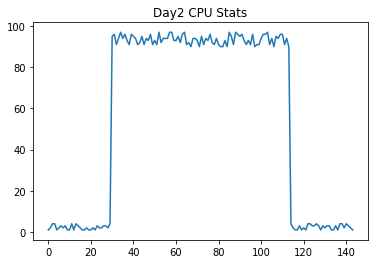

In [7]:
draw_pic('Day2 CPU Stats', day2_stats)

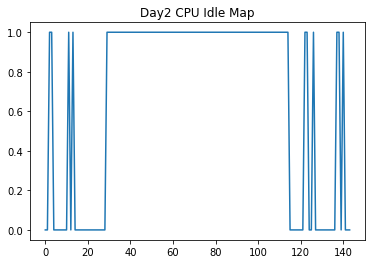

In [8]:
draw_pic('Day2 CPU Idle Map', day2_idle_map)

In [9]:
print(day3_stats)
print(calc_idle_threshold(day3_stats))
print(day3_idle_map)
show_idle_time_windows(day3_idle_time_windows)

[3, 1, 4, 4, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 1, 3, 3, 97, 92, 91, 91, 96, 92, 92, 94, 97, 92, 92, 93, 91, 92, 96, 97, 96, 91, 91, 96, 91, 95, 95, 97, 90, 94, 90, 93, 97, 97, 97, 91, 90, 97, 95, 90, 95, 93, 90, 95, 94, 94, 90, 94, 97, 94, 94, 96, 94, 91, 95, 91, 95, 94, 92, 92, 97, 97, 97, 97, 92, 97, 91, 96, 90, 97, 94, 96, 90, 93, 91, 93, 97, 93, 92, 91, 97, 90, 95, 96, 94, 94, 96, 90, 2, 2, 3, 2, 3, 4, 3, 1, 1, 3, 2, 2, 4, 3, 3, 1, 1, 4, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 2]
3
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]

02:30 ~ 03:30 -> 60  minutes
01:30 ~ 02:10 -> 4

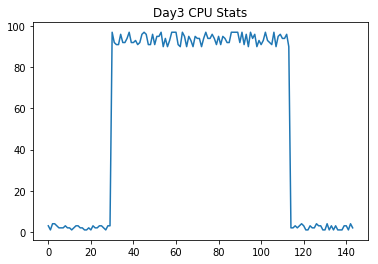

In [10]:
draw_pic('Day3 CPU Stats', day3_stats)

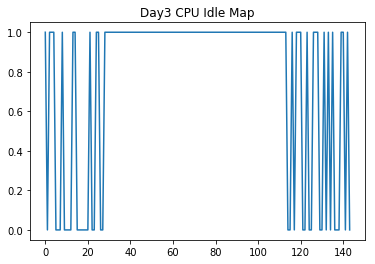

In [11]:
draw_pic('Day3 CPU Idle Map', day3_idle_map)

In [12]:
merged_idle_map = merge_idle_map(day1_idle_map, day2_idle_map)
merged_idle_map = merge_idle_map(merged_idle_map, day3_idle_map)

print(merged_idle_map)

merged_idle_time_windows = collect_idle_time_windows(merged_idle_map)
show_idle_time_windows(merged_idle_time_windows)

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

02:30 ~ 03:00 -> 30  minutes
01:30 ~ 01:50 -> 20  minutes
04:20 ~ 04:40 -> 20  minutes
20:40 ~ 21:00 -> 20  minutes
00:10 ~ 00:20 -> 10  minutes
00:50 ~ 01:00 -> 10  minutes
01:10 ~ 01:20 -> 10  minutes
02:00 ~ 02:10 -> 10  minutes
03:10 ~ 03:20 -> 10  minutes
19:30 ~ 19:40 -> 10  minutes
20:10 ~ 20:20 -> 10  minutes
21:40 ~ 21:50 -> 10  minutes
22:20 ~ 22:30 -> 10  minutes


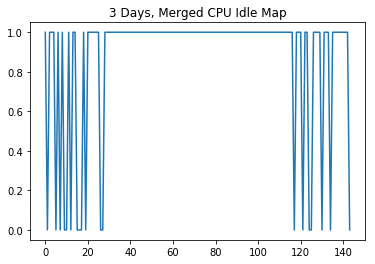

In [13]:
idle_map = merged_idle_map
#idle_map = []
#for index,value in enumerate(merged_idle_map):
#    if index % NR_SAMPLES_PER_HOUR == 0:
#        idle_map.append(value)

draw_pic('3 Days, Merged CPU Idle Map', idle_map)